In [18]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


label
ham     4825
spam     747
Name: count, dtype: int64


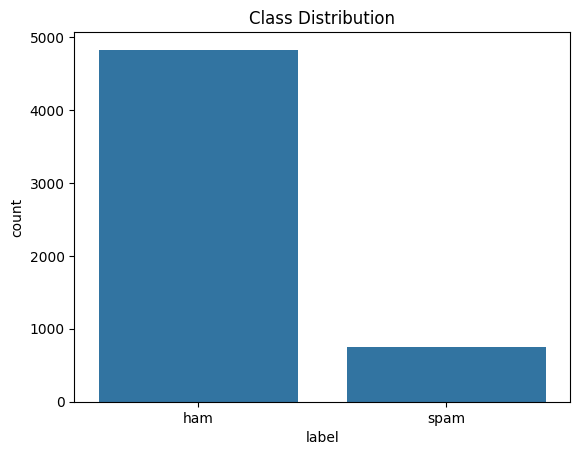

In [11]:
# === Load & Inspect Data ===
url = "https://raw.githubusercontent.com/gyq1985/nlp/main/spam.csv"
df = pd.read_csv(url, encoding='latin-1')[['spamORham', 'Message']]
df = df.rename(columns={'spamORham': 'label', 'Message': 'text'})
display(df.head())
print(df['label'].value_counts())

sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.show()


In [12]:
# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

# === TF‑IDF Vectoriser ===
tfidf = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=5000,
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# Encode labels to numeric
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)


Logistic Regression Accuracy: 0.9830
## Logistic Regression Evaluation
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



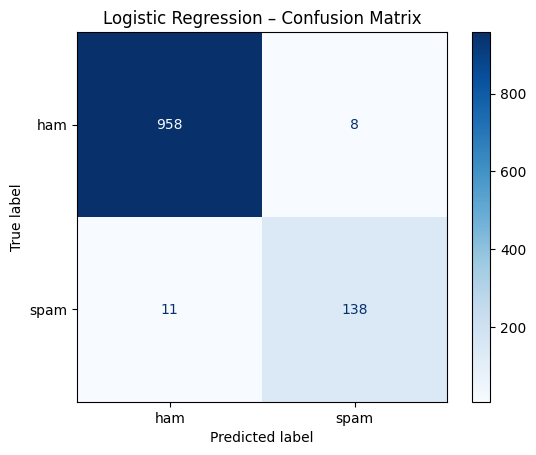

In [19]:
# === Logistic Regression ===
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
log_reg.fit(X_train_tfidf, y_train_enc)
y_pred_log = log_reg.predict(X_test_tfidf)

acc_log = accuracy_score(y_test_enc, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")

print("## Logistic Regression Evaluation")
print(classification_report(y_test_enc, y_pred_log, target_names=le.classes_))

cm_log = confusion_matrix(y_test_enc, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=le.classes_)
disp_log.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.9830
## SVM Evaluation
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



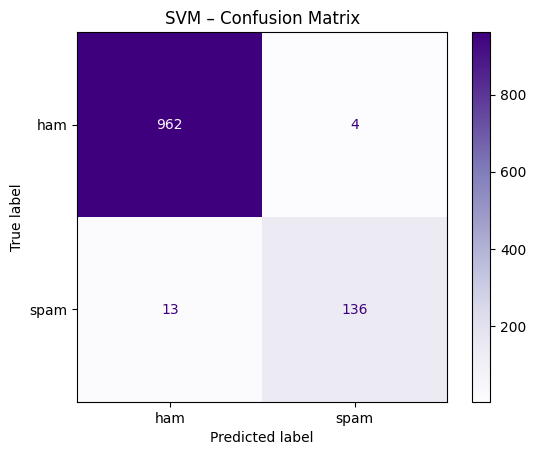

In [20]:
# === Linear SVM (LinearSVC) ===
svm_clf = LinearSVC(class_weight='balanced')
svm_clf.fit(X_train_tfidf, y_train_enc)
y_pred_svm = svm_clf.predict(X_test_tfidf)
acc_log = accuracy_score(y_test_enc, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print("## SVM Evaluation")
print(classification_report(y_test_enc, y_pred_svm, target_names=le.classes_))

cm_svm = confusion_matrix(y_test_enc, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=le.classes_)
disp_svm.plot(cmap='Purples', values_format='d')
plt.title("SVM – Confusion Matrix")
plt.show()
